# Propuesta económica: Proyecto Procesamiento y Migración Sísmica Terrestre en Tiempo
### Elaborada por [Douglas Gómez](mailto:agomezr@imp.mx), [Juan Lara](mailto:jdlara@imp.mx) y [Manuel Espinosa](mailto:meortega@imp.mx)
**Agosto 2018**
 
Este cuaderno de trabajo* `Jupyter` describe los argumentos de la propuesta ecónomica para procesamiento y migración de datos sísmicos para la compañia Jaguar.

El `IMP` tiene capacidad de procesamiento de datos sísmicos terrestres en tiempo de 320 kilómetros cuadrado por mes, a partir del cálculo y aplicación de estáticas residuales. El precio del servicio es de 1.02 milones [MXP].

   Las características físicas de cómputo del clúster para ejecutar el proyecto son:
       - 48 procesadores
       - 128 GB de memoria RAM
       - 196 Tb de almacenamiento
<br />
*No redistribuir

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
#import matplotlib.cbook as cbook
import matplotlib.image as image

%matplotlib inline

#### Premisa técnica

Considerando que el área mensual de procesamiento y migración de datos sísmicos está descrita por la ecuación (Ec. 1), deducida empíricamente por el grupo del Centro de Procesamiento de Datos Geofísicos, el área se describe en la Fig. 1:

$ A ({n}) = 320 \left( 1 +  \frac{\sqrt7}{2} \times t_{n} \right) [km^2] $,   donde $[n = 0,...,23]$ ......... Ecuación 1

In [2]:
periodo = np.linspace(0,23,24) #Vector de tiempo de un año en meses
km_in = 320 #Número de kilómetros iniciales
Precio_mensual = 1020239 #Precio del servicio por mes
Precio_24MXP = np.linspace(1020239, 1020239*24, 24) #Vector de precio por meses 

In [3]:
def area_procesamiento(r): # Ecuación 1
    area = km_in*(1 + (np.sqrt(7)/2)*r)
    return area

In [4]:
area = np.floor(area_procesamiento(r=periodo)) #Redondear el área al número menor inmediato

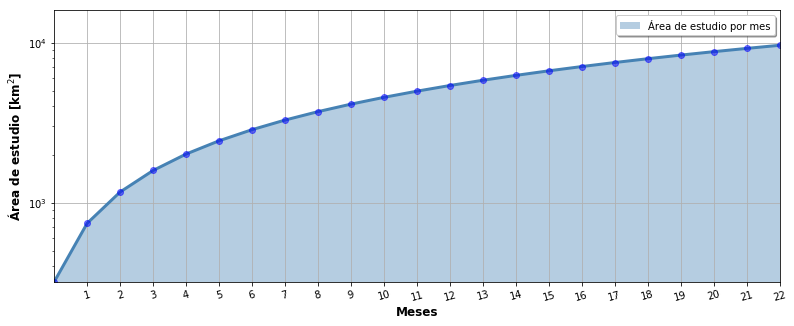

In [5]:
plt.figure(figsize=[13,5]) #Figura 1
_ = plt.semilogy(periodo,area, color='steelblue', lw=3)
_ = plt.semilogy(periodo,area, 'o', color='b', alpha=0.5)
_ = plt.ylim(320, 16000)
_ = plt.xlim(0, 22)
_ = plt.xticks( [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22] ,  \
               ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'], rotation=15, color='k')
_ = plt.fill_between(periodo,0,area,facecolor='steelblue',label='Área de estudio por mes', alpha=0.4)
_ = plt.grid(True)
_ = plt.legend(loc='best', shadow=True, fancybox=True)
_ = plt.ylabel('Área de estudio [km$^2$]', weight = 'semibold', fontsize=12)
_ = plt.xlabel('Meses', weight = 'semibold', fontsize=12)
#_ = plt.title('Figura 1')
plt.savefig('curva_volumen_vs_tiempo_transparente1.png', transparent=True, dpi=600, bbox_inches='tight')
plt.savefig('curva_volumen_vs_tiempo.png', transparent=False, dpi=600, bbox_inches='tight')

Tomando como referencia un [tipo de cambio](http://www.banxico.org.mx/portal-mercado-cambiario/) de 19 pesos MXP por dólar USD (14/08/18), los precios por kilómetro cuadrádo está dado por las Ecs. 2 y 3:

In [6]:
kmcuad_MXP = np.ceil(Precio_24MXP/area) #Ecuación 2. Se redonda el valor al número entero superior próximo.
kmcuad_USD = np.ceil((Precio_24MXP/area)/19) #Ecuación 3

In [7]:
print ("- El precio del kilómetro cuadrado en MXP por mes es:", kmcuad_MXP)
print ("- El precio del kilómetros cuadrados en USD por mes es:", kmcuad_USD)
print ("- Área por mes:", area)

- El precio del kilómetro cuadrado en MXP por mes es: [3189. 2747. 2625. 2569. 2535. 2513. 2498. 2487. 2478. 2471. 2465. 2461.
 2457. 2453. 2451. 2448. 2446. 2444. 2442. 2440. 2439. 2438. 2436. 2435.]
- El precio del kilómetros cuadrados en USD por mes es: [168. 145. 139. 136. 134. 133. 132. 131. 131. 131. 130. 130. 130. 130.
 129. 129. 129. 129. 129. 129. 129. 129. 129. 129.]
- Área por mes: [  320.   743.  1166.  1589.  2013.  2436.  2859.  3283.  3706.  4129.
  4553.  4976.  5399.  5823.  6246.  6669.  7093.  7516.  7939.  8363.
  8786.  9209.  9633. 10056.]


#### Propuesta: Curva económica 
La Fig. 2 representa la curva de nuestra propuesta económica. El precio se desglosa a continuación:

- Mes 1: 1 km$^2$ x 168 USD 
- Mes 2: 1 km$^2$ x 145 USD
- Mes 3: 1 km$^2$ x 139 USD
- Mes 4: 1 km$^2$ x 136 USD
- Mes 5: 1 km$^2$ x 134 USD 
- Mes 6: 1 km$^2$ x 133 USD
- Mes 7: 1 km$^2$ x 132 USD
- Mes 8: 1 km$^2$ x 131 USD
- Mes 9: 1 km$^2$ x 130 USD
- [...]
- Mes 15: 1 km$^2$ x 129 USD

A partir del noveno mes (3707 km$^2$ procesados) el precio se mantiene cuasi constante y representa la asíntota del precio de venta del servicio. 

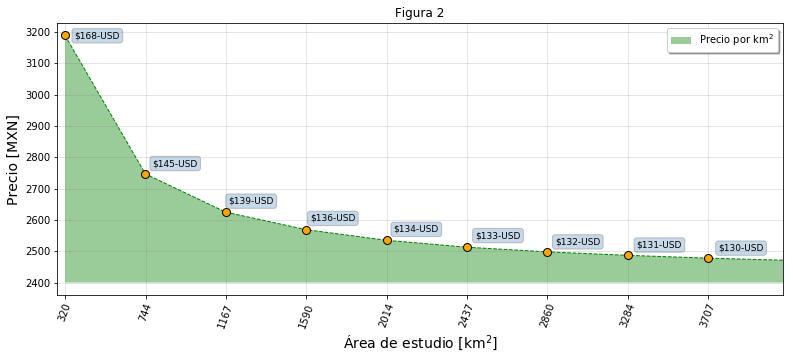

In [8]:
plt.figure(figsize=[13,5])
_ = plt.plot(area, kmcuad_MXP, '--', lw=1, color= 'green')
_ = plt.plot(area, kmcuad_MXP, 'o', color='k', mfc='orange', ms = 8)
_ = plt.xlim(280, 4100)
_ = plt.xticks( [320,744,1167,1590,2014,2437,2860,3284, 3707] ,  \
               ['320', '744', '1167','1590', '2014', '2437', '2860', '3284', '3707'], rotation=70, color='k') 
_ = plt.xlabel('Área de estudio [km$^2$]', fontsize=14)
_ = plt.ylabel('Precio [MXN]', fontsize=14)
_ = plt.grid(alpha = 0.25, color = 'gray', linestyle='-')
_ = plt.fill_between(area,2400,kmcuad_MXP,facecolor='green',label='Precio por km$^2$', alpha=0.4)
_ = plt.legend(loc='best', shadow=True, fancybox=True)
_ = plt.title('Figura 2')
bbox_props = dict(boxstyle="round", fc="steelblue", ec="0.3", alpha=0.3)
_ = plt.text(490,3188, "$168-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(900, 2780, "$145-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(1300, 2660, "$139-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(1730, 2605, "$136-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(2170, 2570, "$134-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(2600, 2550, "$133-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(3020, 2530, "$132-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(3450, 2520, "$131-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(3880, 2510, "$130-USD", ha="center", va="center", size=9,bbox=bbox_props)

La Fig. 3 muestra la curva de precio en MXP en un lapso de 24 meses.

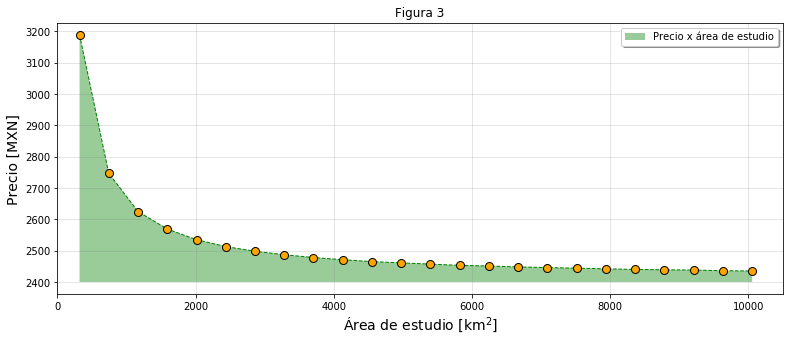

In [9]:
plt.figure(figsize=[13,5])
_ = plt.plot(area, kmcuad_MXP, '--', lw=1, color= 'green')
_ = plt.plot(area, kmcuad_MXP, 'o', color='k', mfc='orange', ms = 8)
_ = plt.xlim(0, 10500)
_ = plt.xlabel('Área de estudio [km$^2$]', fontsize=14)
_ = plt.ylabel('Precio [MXN]', fontsize=14)
_ = plt.grid(alpha = 0.25, color = 'gray', linestyle='-')
_ = plt.fill_between(area,2400,kmcuad_MXP,facecolor='green',label='Precio x área de estudio', alpha=0.4)
_ = plt.legend(loc='best', shadow=True, fancybox=True)
_ = plt.title('Figura 3')

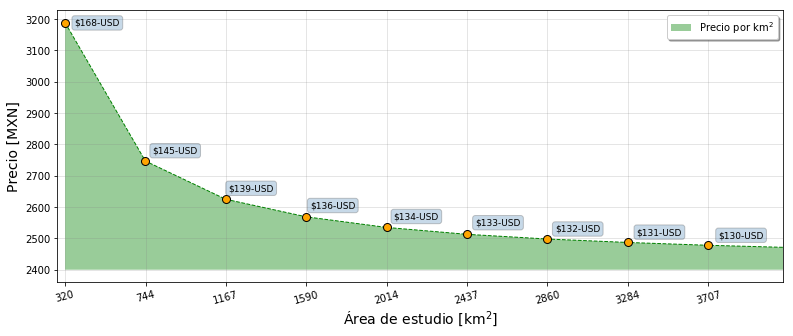

In [10]:
plt.figure(figsize=[13,5])
_ = plt.plot(area, kmcuad_MXP, '--', lw=1, color= 'green')
_ = plt.plot(area, kmcuad_MXP, 'o', color='k', mfc='orange', ms = 8)
_ = plt.xlim(280, 4100)
_ = plt.xticks( [320,744,1167,1590,2014,2437,2860,3284, 3707] ,  \
               ['320', '744', '1167','1590', '2014', '2437', '2860', '3284', '3707'], rotation=15, color='k') 
_ = plt.xlabel('Área de estudio [km$^2$]', fontsize=14)
_ = plt.ylabel('Precio [MXN]', fontsize=14)
_ = plt.grid(alpha = 0.25, color = 'gray', linestyle='-')
_ = plt.fill_between(area,2400,kmcuad_MXP,facecolor='green',label='Precio por km$^2$', alpha=0.4)
_ = plt.legend(loc='best', shadow=True, fancybox=True)
#_ = plt.title('Figura 2')
bbox_props = dict(boxstyle="round", fc="steelblue", ec="0.3", alpha=0.3)
_ = plt.text(490,3188, "$168-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(900, 2780, "$145-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(1300, 2660, "$139-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(1730, 2605, "$136-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(2170, 2570, "$134-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(2600, 2550, "$133-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(3020, 2530, "$132-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(3450, 2520, "$131-USD", ha="center", va="center", size=9,bbox=bbox_props)
_ = plt.text(3880, 2510, "$130-USD", ha="center", va="center", size=9,bbox=bbox_props)

plt.savefig('curva_costo_transparente.png', transparent=True, dpi=600, bbox_inches='tight')
plt.savefig('curva_costo_opaco.png', transparent=False, dpi=600, bbox_inches='tight')

plt.show()

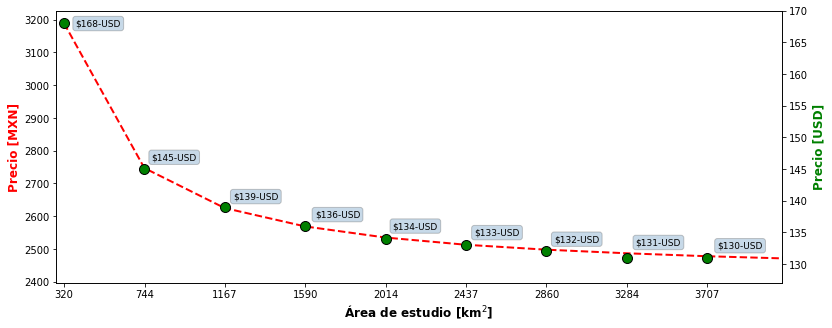

In [11]:
fig = plt.figure(figsize=[13,5])
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.plot(area, kmcuad_MXP, '--', lw=2, color= 'red')
ax2.plot(area, kmcuad_USD, 'o', color='k', mfc='green', ms = 10)

ax1.set_xbound(lower=280, upper=4100)
ax2.set_xbound(lower=280, upper=4100)

_ = plt.xticks( [320,744,1167,1590,2014,2437,2860,3284, 3707] ,  \
               ['320', '744', '1167','1590', '2014', '2437', '2860', '3284', '3707']) 

#ax2.plot(t, 1000 / (t + 1), 'r-')
ax1.set_ylabel('Precio [MXN]', color='red', fontsize = 12, weight = 'semibold')
ax2.set_ylabel('Precio [USD]', color='green', fontsize = 12, weight = 'semibold')
ax1.set_xlabel('Área de estudio [km$^2$]', fontsize = 12, weight = 'semibold')

bbox_props = dict(boxstyle="round", fc="steelblue", ec="0.3", alpha=0.3)
ax1.text(500,3188, "$168-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(900, 2780, "$145-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(1330, 2660, "$139-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(1760, 2605, "$136-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(2170, 2570, "$134-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(2600, 2550, "$133-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(3020, 2530, "$132-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(3450, 2520, "$131-USD", ha="center", va="center", size=9,bbox=bbox_props)
ax1.text(3880, 2510, "$130-USD", ha="center", va="center", size=9,bbox=bbox_props)

#plt.savefig('curva_costo_transparente1.png', transparent=True, dpi=600, bbox_inches='tight')
#plt.savefig('curva_costo_opaco1.png', transparent=False, dpi=600, bbox_inches='tight')

plt.show()
